In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

Found 4571 images belonging to 4 classes.


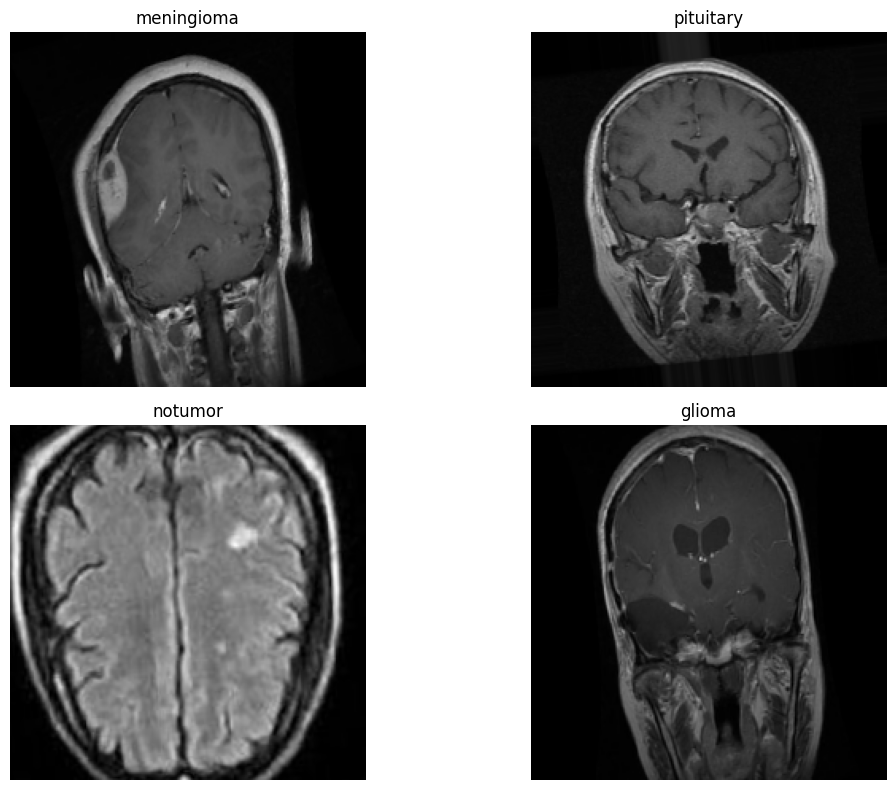

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths and parameters again
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset/Training"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Get one batch
images, labels = next(train_gen)
class_names = list(train_gen.class_indices.keys())

# Plot one image from each class
plt.figure(figsize=(12, 8))
shown = set()
idx = 1

for i in range(len(images)):
    class_id = labels[i].argmax()
    if class_id not in shown:
        plt.subplot(2, 2, idx)
        plt.imshow(images[i])
        plt.title(class_names[class_id])
        plt.axis("off")
        shown.add(class_id)
        idx += 1
    if len(shown) == len(class_names):
        break

plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset/Training"
TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

NUM_CLASSES = train_gen.num_classes
print("Number of classes:", NUM_CLASSES)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Number of classes: 4


In [13]:
cnn_model = models.Sequential([
    layers.Input(shape=(224,224,3)),   # fixes input_shape warning
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')  # fixed
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,700 (84.86 MB)

 Trainable params: 22,245,700 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1770651417.582129      95 service.cc:152] XLA service 0x7fe0e8009120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770651417.582168      95 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1770651417.582174      95 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1770651418.106324      95 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-09 15:37:01.404963: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 15:37:01.553229: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  2/143 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.1172 - loss: 2.0122 

I0000 00:00:1770651424.960026      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 14/143 ━━━━━━━━━━━━━━━━━━━━ 32s 249ms/step - accuracy: 0.3230 - loss: 1.7887

2026-02-09 15:37:10.485856: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 15:37:10.633479: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 370ms/step - accuracy: 0.6251 - loss: 0.9811 - val_accuracy: 0.7064 - val_loss: 0.8549
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.8605 - loss: 0.3679 - val_accuracy: 0.7169 - val_loss: 0.7956
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.9115 - loss: 0.2547 - val_accuracy: 0.8107 - val_loss: 0.6543
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.9479 - loss: 0.1440 - val_accuracy: 0.8081 - val_loss: 0.6436
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.9588 - loss: 0.1242 - val_accuracy: 0.7862 - val_loss: 0.9187
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.9754 - loss: 0.0739 - val_accuracy: 0.8019 - val_loss: 0.9262
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.9818 - loss: 0.0613 - val_accuracy: 0.8054 - val_loss: 1.1462
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.9845 - loss: 0.0507 - val

In [16]:
loss, acc = cnn_model.evaluate(val_gen)
print("Test Accuracy:", acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7921 - loss: 1.6710
Test Accuracy: 0.8150745034217834


In [4]:
from tensorflow.keras.applications import MobileNetV2

base_mob = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_mob.trainable = False

model_mobilenet = models.Sequential([
    base_mob,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_mobilenet.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_mobilenet = model_mobilenet.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'NUM_CLASSES' is not defined

In [ ]:
loss, acc = model_mobilenet.evaluate(test_gen)
print("Test Accuracy:", acc)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Use preprocess_input for EfficientNet
train_datagen_eff = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen_eff = train_datagen_eff.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen_eff = train_datagen_eff.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen_eff = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen_eff = test_datagen_eff.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

base_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_eff.trainable = False  # first stage: freeze

model_effnet = models.Sequential([
    base_eff,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_effnet.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
]

history_effnet = model_effnet.fit(
    train_gen_eff,
    validation_data=val_gen_eff,
    epochs=20,
    callbacks=callbacks
)

In [ ]:
loss, acc = model_effnet.evaluate(test_gen_eff)
print("EfficientNet Test Accuracy:", acc)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths & params (redefine to avoid NameError)
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset/Training"
TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Generators with ResNet preprocessing
train_datagen_res = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen_res = train_datagen_res.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen_res = train_datagen_res.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen_res = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen_res = test_datagen_res.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

NUM_CLASSES = train_gen_res.num_classes

# Build ResNet model
base_res = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_res.trainable = False  # stage 1: freeze

model_resnet = models.Sequential([
    base_res,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model_resnet.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
]

# Train
history_resnet = model_resnet.fit(
    train_gen_res,
    validation_data=val_gen_res,
    epochs=20,
    callbacks=callbacks
)

# Optional fine-tuning (unfreeze top layers)
for layer in base_res.layers[:-40]:
    layer.trainable = False
for layer in base_res.layers[-40:]:
    layer.trainable = True

model_resnet.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model_resnet.fit(
    train_gen_res,
    validation_data=val_gen_res,
    epochs=10,
    callbacks=callbacks
)

# Evaluate
loss, acc = model_resnet.evaluate(test_gen_res)
print("ResNet50 Test Accuracy:", acc)

In [ ]:
loss, acc = model_resnet.evaluate(test_gen_res)
print("EfficientNet Test Accuracy:", acc)

In [ ]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Path to test dataset
TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"

# Pick a random class folder
class_name = random.choice(os.listdir(TEST_DIR))
class_path = os.path.join(TEST_DIR, class_name)

# Pick a random image from that class
img_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_name)

# Load and preprocess image
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
pred = model_resnet.predict(img_array)
pred_class = np.argmax(pred)
confidence = np.max(pred) * 100

# Get class labels
class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[pred_class]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Actual: {class_name}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")
plt.show()

# Tumor / No Tumor message
if predicted_label.lower() == "notumor":
    print("🧠 Result: No Brain Tumor Detected")
else:
    print("🧠 Result: Brain Tumor Detected")

In [ ]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model

# Pick random test image
TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"
class_name = random.choice(os.listdir(TEST_DIR))
class_path = os.path.join(TEST_DIR, class_name)
img_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_name)

# Load image
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
input_arr = np.expand_dims(img_array, axis=0)
input_arr = preprocess_input(input_arr)

# Predict
pred = model_resnet.predict(input_arr)
pred_class = np.argmax(pred)
confidence = np.max(pred) * 100

class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[pred_class]

# -------- Robust Grad-CAM for Sequential ResNet -------- #
base_model = model_resnet.layers[0]  # ResNet backbone
base_model.trainable = True          # enable gradients for visualization

# Rebuild graph in functional style
inputs = tf.keras.Input(shape=(224,224,3))
x = inputs
conv_outputs = base_model(x)

y = conv_outputs
for layer in model_resnet.layers[1:]:
    y = layer(y)

grad_model = Model(inputs, [conv_outputs, y])

with tf.GradientTape() as tape:
    conv, preds = grad_model(input_arr, training=False)
    loss = preds[:, pred_class]

grads = tape.gradient(loss, conv)

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv = conv[0]
heatmap = conv @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
heatmap = heatmap.numpy()

# Resize heatmap
heatmap = tf.image.resize(heatmap[..., np.newaxis], (224,224)).numpy().squeeze()

# Overlay
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.imshow(heatmap, cmap="jet", alpha=0.4)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
plt.show()

# Text Output
if predicted_label.lower() == "notumor":
    print("🧠 Result: No Brain Tumor Detected")
else:
    print(f"🧠 Result: {predicted_label.upper()} Tumor Detected")

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam


In [18]:
NUM_CLASSES = train_gen.num_classes  # must be run after data generator


In [19]:
# Input layer
input_layer = layers.Input(shape=(224,224,3))

# -------- CNN Branch -------- #
x1 = layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x1 = layers.MaxPooling2D(2,2)(x1)
x1 = layers.Conv2D(64, (3,3), activation='relu')(x1)
x1 = layers.MaxPooling2D(2,2)(x1)
x1 = layers.Flatten()(x1)

# -------- ResNet Branch -------- #
resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_layer
)
resnet_base.trainable = False

x2 = resnet_base.output
x2 = layers.GlobalAveragePooling2D()(x2)

# -------- Feature Fusion -------- #
combined = layers.Concatenate()([x1, x2])
combined = layers.Dense(256, activation='relu')(combined)
combined = layers.Dropout(0.5)(combined)
output = layers.Dense(NUM_CLASSES, activation='softmax')(combined)

# Final Hybrid Model
hybrid_model = models.Model(inputs=input_layer, outputs=output)

hybrid_model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hybrid_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 71,908,420 (274.31 MB)

 Trainable params: 48,320,708 (184.33 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
history_hybrid = hybrid_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 53s 269ms/step - accuracy: 0.5776 - loss: 0.9805 - val_accuracy: 0.7169 - val_loss: 0.7989
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.8448 - loss: 0.4246 - val_accuracy: 0.7660 - val_loss: 0.7337
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.8904 - loss: 0.3123 - val_accuracy: 0.7537 - val_loss: 0.7482
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9049 - loss: 0.2452 - val_accuracy: 0.7791 - val_loss: 0.7480
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9403 - loss: 0.1879 - val_accuracy: 0.7756 - val_loss: 0.7699
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9555 - loss: 0.1486 - val_accuracy: 0.7774 - val_loss: 0.7637
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.9604 - loss: 0.1199 - val_accuracy: 0.7809 - val_loss: 0.7820
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9792 - loss: 0

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1311 images belonging to 4 classes.


In [25]:
loss, acc = hybrid_model.evaluate(test_gen)
print("Hybrid Model Accuracy:", acc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 404ms/step - accuracy: 0.8653 - loss: 0.6459
Hybrid Model Accuracy: 0.9130434989929199


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.optimizers import Adam


In [27]:
NUM_CLASSES = train_gen.num_classes


In [28]:
# Input
input_layer = layers.Input(shape=(224,224,3))

# -------- ResNet Branch -------- #
resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_layer
)
resnet.trainable = False
r = resnet.output
r = layers.GlobalAveragePooling2D()(r)

# -------- EfficientNet Branch -------- #
effnet = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_tensor=input_layer
)
effnet.trainable = False
e = effnet.output
e = layers.GlobalAveragePooling2D()(e)

# -------- Feature Fusion -------- #
combined = layers.Concatenate()([r, e])
combined = layers.BatchNormalization()(combined)
combined = layers.Dense(512, activation='relu')(combined)
combined = layers.Dropout(0.5)(combined)
combined = layers.Dense(256, activation='relu')(combined)
output = layers.Dense(NUM_CLASSES, activation='softmax')(combined)

# Final model
hybrid_model_2 = models.Model(inputs=input_layer, outputs=output)

hybrid_model_2.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hybrid_model_2.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 29,487,399 (112.49 MB)

 Trainable params: 1,843,460 (7.03 MB)

 Non-trainable params: 27,643,939 (105.45 MB)

In [29]:
history_hybrid2 = hybrid_model_2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


Epoch 1/20


2026-02-09 16:17:33.404375: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:33.548063: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:33.895488: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:34.036141: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:34.774968: E external/local_xla/xla/stream_

 26/143 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.3565 - loss: 1.3220

2026-02-09 16:17:54.752798: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:54.895203: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:55.234823: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:55.375102: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:17:56.089932: E external/local_xla/xla/stream_

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.5300 - loss: 1.0654

2026-02-09 16:18:38.741328: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:18:38.883175: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:18:39.024281: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:18:39.352305: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:18:39.492929: E external/local_xla/xla/stream_

143/143 ━━━━━━━━━━━━━━━━━━━━ 97s 436ms/step - accuracy: 0.5307 - loss: 1.0643 - val_accuracy: 0.3821 - val_loss: 1.2403
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.7212 - loss: 0.6928 - val_accuracy: 0.6170 - val_loss: 0.9915
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.7587 - loss: 0.6199 - val_accuracy: 0.7213 - val_loss: 0.8072
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.7802 - loss: 0.5499 - val_accuracy: 0.7371 - val_loss: 0.7539
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.7800 - loss: 0.5569 - val_accuracy: 0.7485 - val_loss: 0.7107
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.7951 - loss: 0.5004 - val_accuracy: 0.7458 - val_loss: 0.7212
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8031 - loss: 0.4928 - val_accuracy: 0.7432 - val_loss: 0.7310
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8028 - loss: 0.4709 - val

In [30]:
# Unfreeze top layers for fine-tuning
resnet.trainable = True
effnet.trainable = True

hybrid_model_2.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = hybrid_model_2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


2026-02-09 16:35:53.996084: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:35:54.147925: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 93/143 ━━━━━━━━━━━━━━━━━━━━ 22s 441ms/step - accuracy: 0.5303 - loss: 2.0425

2026-02-09 16:37:42.707144: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:37:42.855496: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:37:51.783407: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 16:37:51.925491: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


143/143 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.5993 - loss: 1.6940 - val_accuracy: 0.2796 - val_loss: 11.7527
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 461ms/step - accuracy: 0.9118 - loss: 0.2713 - val_accuracy: 0.2796 - val_loss: 11.8307
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 458ms/step - accuracy: 0.9440 - loss: 0.1589 - val_accuracy: 0.2813 - val_loss: 12.6717
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 456ms/step - accuracy: 0.9731 - loss: 0.0757 - val_accuracy: 0.2875 - val_loss: 13.1071
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 463ms/step - accuracy: 0.9804 - loss: 0.0622 - val_accuracy: 0.2901 - val_loss: 11.4408
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 457ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.2910 - val_loss: 9.6725
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 65s 457ms/step - accuracy: 0.9890 - loss: 0.0316 - val_accuracy: 0.3409 - val_loss: 6.0196
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 466ms/step - accuracy: 0.9916 - loss: 0.0222 - 

In [33]:
loss, acc = hybrid_model_2.evaluate(test_gen)
print("Hybrid ResNet + EfficientNet Accuracy:", acc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.6057 - loss: 1.8773
Hybrid ResNet + EfficientNet Accuracy: 0.6025934219360352


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [35]:
DATA_DIR = "/kaggle/input/brain-tumor-mri-dataset/Training"
TEST_DIR = "/kaggle/input/brain-tumor-mri-dataset/Testing"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [36]:
from tensorflow.keras.applications.resnet import preprocess_input as resnet_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre

def hybrid_preprocess(x):
    x = tf.cast(x, tf.float32)
    x = resnet_pre(x)
    x = eff_pre(x)
    return x


In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_ds.cardinality().numpy()
print("Classes:", NUM_CLASSES)

# Apply preprocessing
train_ds = train_ds.map(lambda x, y: (hybrid_preprocess(x), y))
val_ds   = val_ds.map(lambda x, y: (hybrid_preprocess(x), y))
test_ds  = test_ds.map(lambda x, y: (hybrid_preprocess(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
Classes: 143


In [38]:
# Input
inputs = layers.Input(shape=(224,224,3))

# -------- ResNet Branch -------- #
resnet = ResNet50(
    weights="imagenet",
    include_top=False,
    input_tensor=inputs
)
resnet.trainable = False
r = layers.GlobalAveragePooling2D()(resnet.output)

# -------- EfficientNet Branch -------- #
effnet = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_tensor=inputs
)
effnet.trainable = False
e = layers.GlobalAveragePooling2D()(effnet.output)

# -------- Feature Fusion -------- #
x = layers.Concatenate()([r, e])
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation="relu",
                 kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(256, activation="relu")(x)

outputs = layers.Dense(4, activation="softmax")(x)

hybrid_model = models.Model(inputs, outputs)
hybrid_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 29,487,399 (112.49 MB)

 Trainable params: 1,843,460 (7.03 MB)

 Non-trainable params: 27,643,939 (105.45 MB)

In [39]:
hybrid_model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [40]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.3)
]


In [41]:
history_1 = hybrid_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
142/143 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6349 - loss: 1.9010

2026-02-09 17:09:16.201303: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:16.343364: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:16.678263: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:16.818304: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:17.518092: E external/local_xla/xla/stream_

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.6357 - loss: 1.8985

2026-02-09 17:09:46.895768: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:47.037021: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:47.364706: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:47.504564: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-09 17:09:48.210847: E external/local_xla/xla/stream_

143/143 ━━━━━━━━━━━━━━━━━━━━ 94s 460ms/step - accuracy: 0.6366 - loss: 1.8960 - val_accuracy: 0.8835 - val_loss: 1.2339 - learning_rate: 1.0000e-04
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.8636 - loss: 1.2283 - val_accuracy: 0.9054 - val_loss: 1.1141 - learning_rate: 1.0000e-04
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.9040 - loss: 1.1347 - val_accuracy: 0.9247 - val_loss: 1.0646 - learning_rate: 1.0000e-04
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.9101 - loss: 1.0947 - val_accuracy: 0.9326 - val_loss: 1.0306 - learning_rate: 1.0000e-04
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.9185 - loss: 1.0506 - val_accuracy: 0.9361 - val_loss: 1.0055 - learning_rate: 1.0000e-04
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.9385 - loss: 1.0010 - val_accuracy: 0.9440 - val_loss: 0.9714 - learning_rate: 1.0000e-04
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - 

In [42]:
# Unfreeze top layers only
for layer in resnet.layers[-30:]:
    layer.trainable = True

for layer in effnet.layers[-20:]:
    layer.trainable = True

hybrid_model.compile(
    optimizer=Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_2 = hybrid_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 104s 447ms/step - accuracy: 0.9166 - loss: 0.9988 - val_accuracy: 0.9501 - val_loss: 0.9193 - learning_rate: 1.0000e-05
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.9501 - loss: 0.9195 - val_accuracy: 0.9510 - val_loss: 0.9084 - learning_rate: 1.0000e-05
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.9714 - loss: 0.8631 - val_accuracy: 0.9553 - val_loss: 0.9004 - learning_rate: 1.0000e-05
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9777 - loss: 0.8396 - val_accuracy: 0.9588 - val_loss: 0.8998 - learning_rate: 1.0000e-05
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 195ms/step - accuracy: 0.9840 - loss: 0.8229 - val_accuracy: 0.9588 - val_loss: 0.8907 - learning_rate: 1.0000e-05
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 194ms/step - accuracy: 0.9899 - loss: 0.8082 - val_accuracy: 0.9606 - val_loss: 0.8919 - learning_rate: 1.0000e-05
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 1

In [45]:
loss, acc = hybrid_model.evaluate(test_ds)
print("🔥 Hybrid ResNet + EfficientNet Test Accuracy:", acc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9472 - loss: 0.9426
🔥 Hybrid ResNet + EfficientNet Test Accuracy: 0.9633867144584656
